In [13]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dframe = pd.read_csv("Admission_Predict_new.csv")


In [4]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [28]:
dframe.shape

(500, 9)

In [8]:
dframe.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
dframe.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
dframe.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

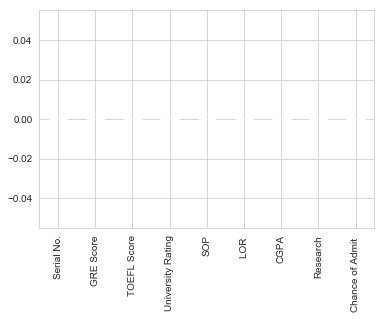

In [12]:
import seaborn as sns
sns.set_style('whitegrid')
missing = dframe.isna().sum()
missing.sort_values(inplace = True)
missing.plot.bar()
# From the graph it is observed that there are not any missing values

In [13]:
import scipy 
test_normality = lambda x: scipy.stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(dframe.iloc[:,:8])
normal = normal.apply(test_normality)
print(normal)
#it is observed that CGPA do not follow normal distribution hence must be transformed

Serial No.            True
GRE Score             True
TOEFL Score           True
University Rating     True
SOP                   True
LOR                   True
CGPA                 False
Research              True
dtype: bool


In [14]:
target = dframe.loc[:,"Chance of Admit "].unique()
print("No of unique values : {}".format(len(target)))

No of unique values : 61


In [15]:
Ids = dframe["Serial No."]

In [16]:
dframe.drop('Serial No.' , inplace = True , axis = 1)

In [14]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Chance of Admit ')]

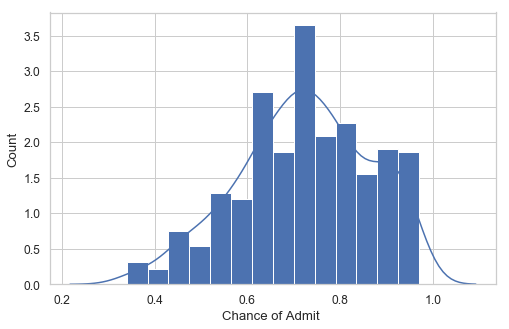

In [18]:
sns.distplot(
    dframe['Chance of Admit '], norm_hist=False, kde= True, hist_kws={"alpha": 1}
).set(xlabel='Chance of Admit ', ylabel='Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Gre Score ')]

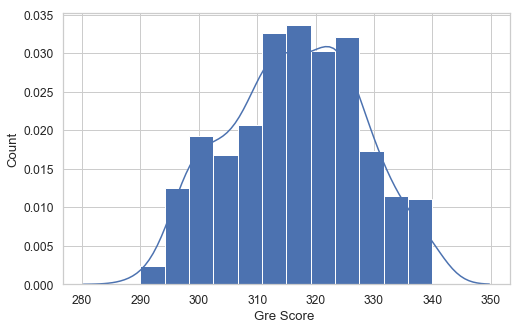

In [19]:
sns.distplot(
    dframe['GRE Score'], norm_hist=False, kde= True,  hist_kws={"alpha": 1}
).set(xlabel='Gre Score ', ylabel='Count')

[Text(0, 0.5, 'count'), Text(0.5, 0, 'CGPA')]

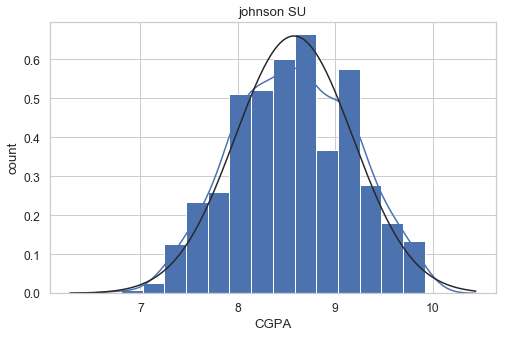

In [20]:
plt.title("johnson SU")
sns.distplot(dframe['CGPA'] , norm_hist = False , kde = True , hist_kws = {'alpha' : 1} , fit = scipy.stats.johnsonsu 
            ).set(xlabel = "CGPA" , ylabel = "count")

[Text(0, 0.5, 'count'), Text(0.5, 0, 'CGPA')]

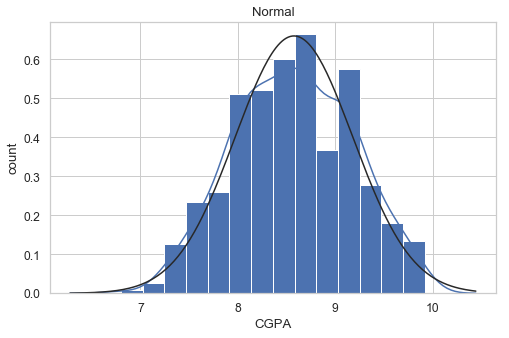

In [21]:
plt.title("Normal")
sns.distplot(dframe['CGPA'] , norm_hist = False , kde = True , hist_kws = {'alpha' : 1} , fit = scipy.stats.norm 
            ).set(xlabel = "CGPA" , ylabel = "count")


[Text(0, 0.5, 'count'), Text(0.5, 0, 'CGPA')]

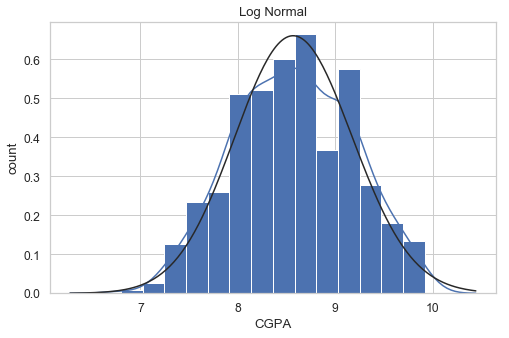

In [22]:
plt.title("Log Normal")
sns.distplot(dframe['CGPA'] , norm_hist = False , kde = True , hist_kws = {'alpha' : 1} , fit = scipy.stats.lognorm 
            ).set(xlabel = "CGPA" , ylabel = "count")

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'TOEFL Score ')]

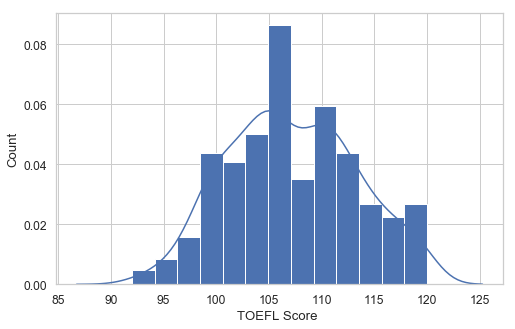

In [23]:

sns.distplot(
    dframe['TOEFL Score'], norm_hist=False, kde= True,  hist_kws={"alpha": 1}
).set(xlabel='TOEFL Score ', ylabel='Count')

#Although log normalization does a pretty good job , unbounded johnsu is the best fit.

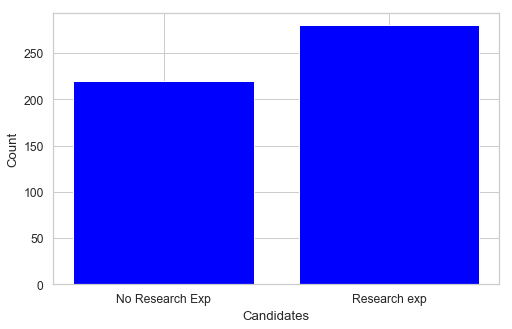

In [24]:
X = ["No Research Exp" , "Research exp"]
y = np.array([len(dframe[dframe.Research == 0]) , len(dframe[dframe.Research == 1])])
plt.bar(X,y , color = "blue")
plt.xlabel("Candidates")
plt.ylabel("Count")
plt.show()
#It is seen from the plot that most of the students have Research Exp , thus the correlation with Chance of admit will be less

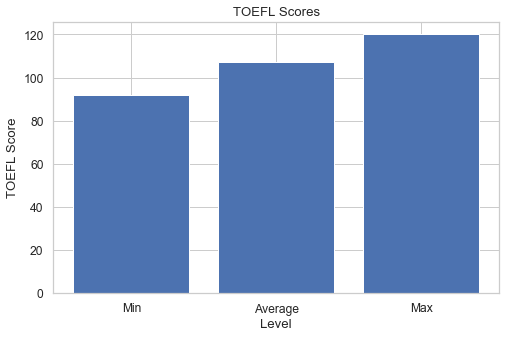

In [25]:
y = np.array([dframe['TOEFL Score'].min() , dframe["TOEFL Score"].mean() , dframe["TOEFL Score"].max()])
x = ["Min" , "Average" , "Max"]
plt.bar(x,y)
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.title("TOEFL Scores")
plt.show()
# The min toefel score lies in range(90-95) , average lies in (100 - 110) and max score is 120

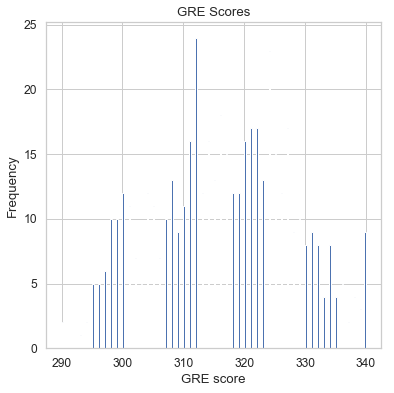

In [20]:
dframe["GRE Score"].plot(kind = 'hist' , bins = 200 , figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE score")
plt.ylabel("Frequency")
plt.show()
#Scire frequency between 310 to 330 is the highest and hence these will be the scores that will make the student standout

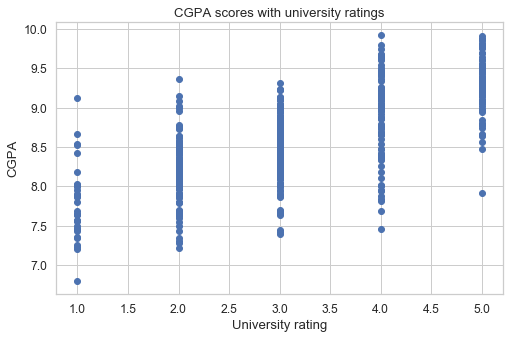

In [21]:
plt.scatter(dframe["University Rating"] , dframe.CGPA)
plt.title("CGPA scores with university ratings")
plt.xlabel("University rating")
plt.ylabel("CGPA")
plt.show()
#As the university rating increases the CGPA scores also increase


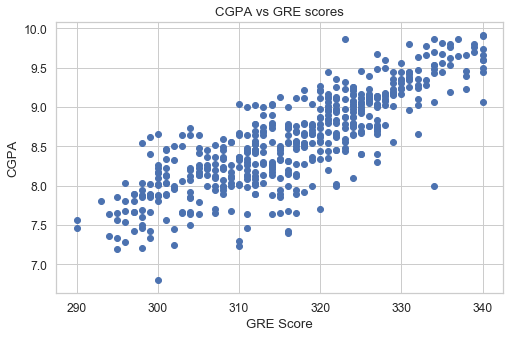

In [18]:
plt.scatter(dframe["GRE Score"] , dframe.CGPA)
plt.title("CGPA vs GRE scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()
# As the GRE score increases the CGPA also tends to increase

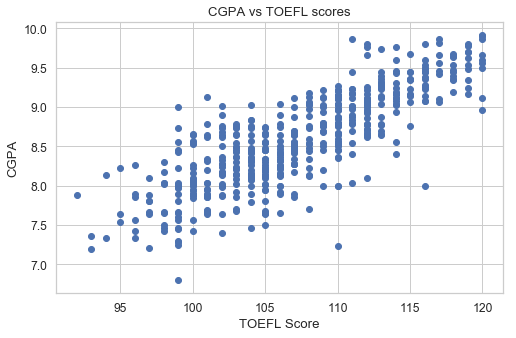

In [19]:
plt.scatter(dframe["TOEFL Score"] , dframe["CGPA"])
plt.title("CGPA vs TOEFL scores")
plt.xlabel("TOEFL Score")
plt.ylabel("CGPA")
plt.show()

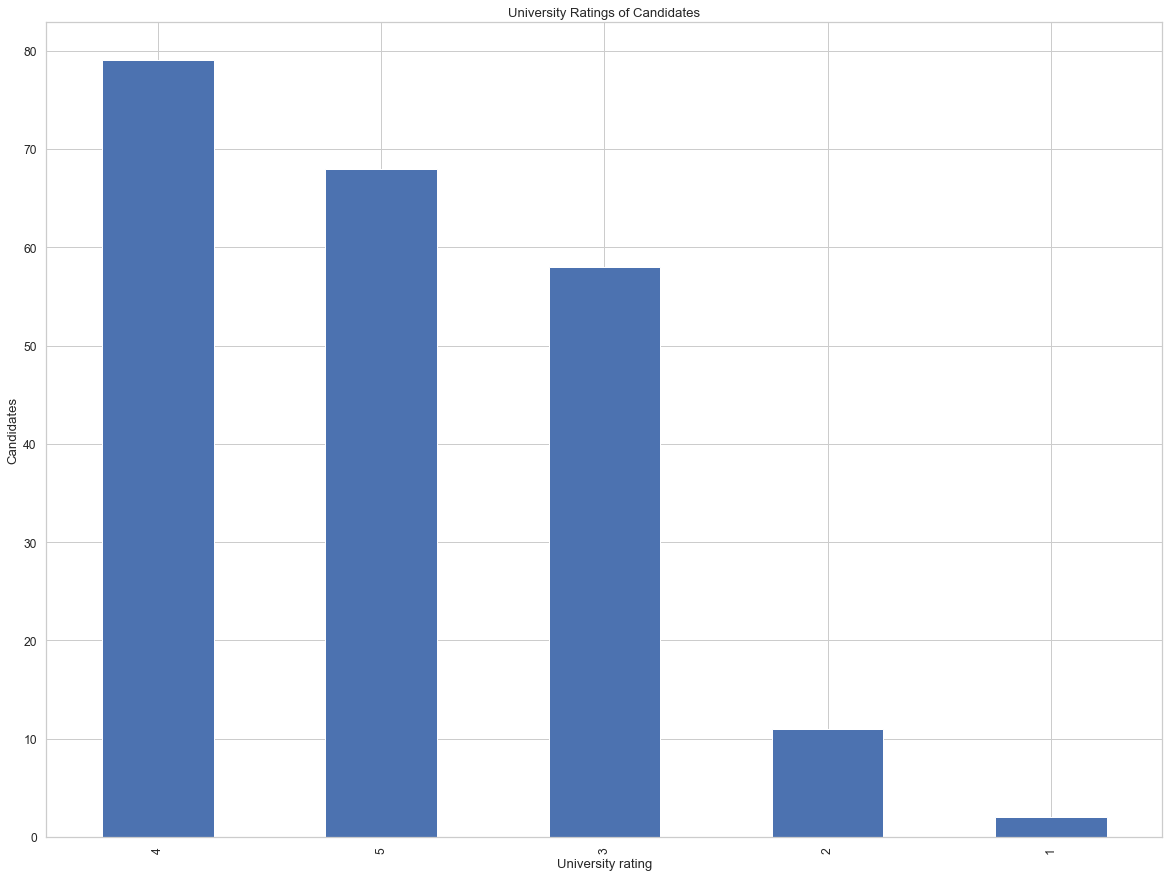

In [32]:
chance_univ = dframe[dframe["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates")
chance_univ.plot(kind = 'bar' , figsize = (20 , 15)  , stacked = "True")
plt.xlabel("University rating")
plt.ylabel("Candidates")
plt.show()
# The candidates with good university rankung have a higher chance of admit

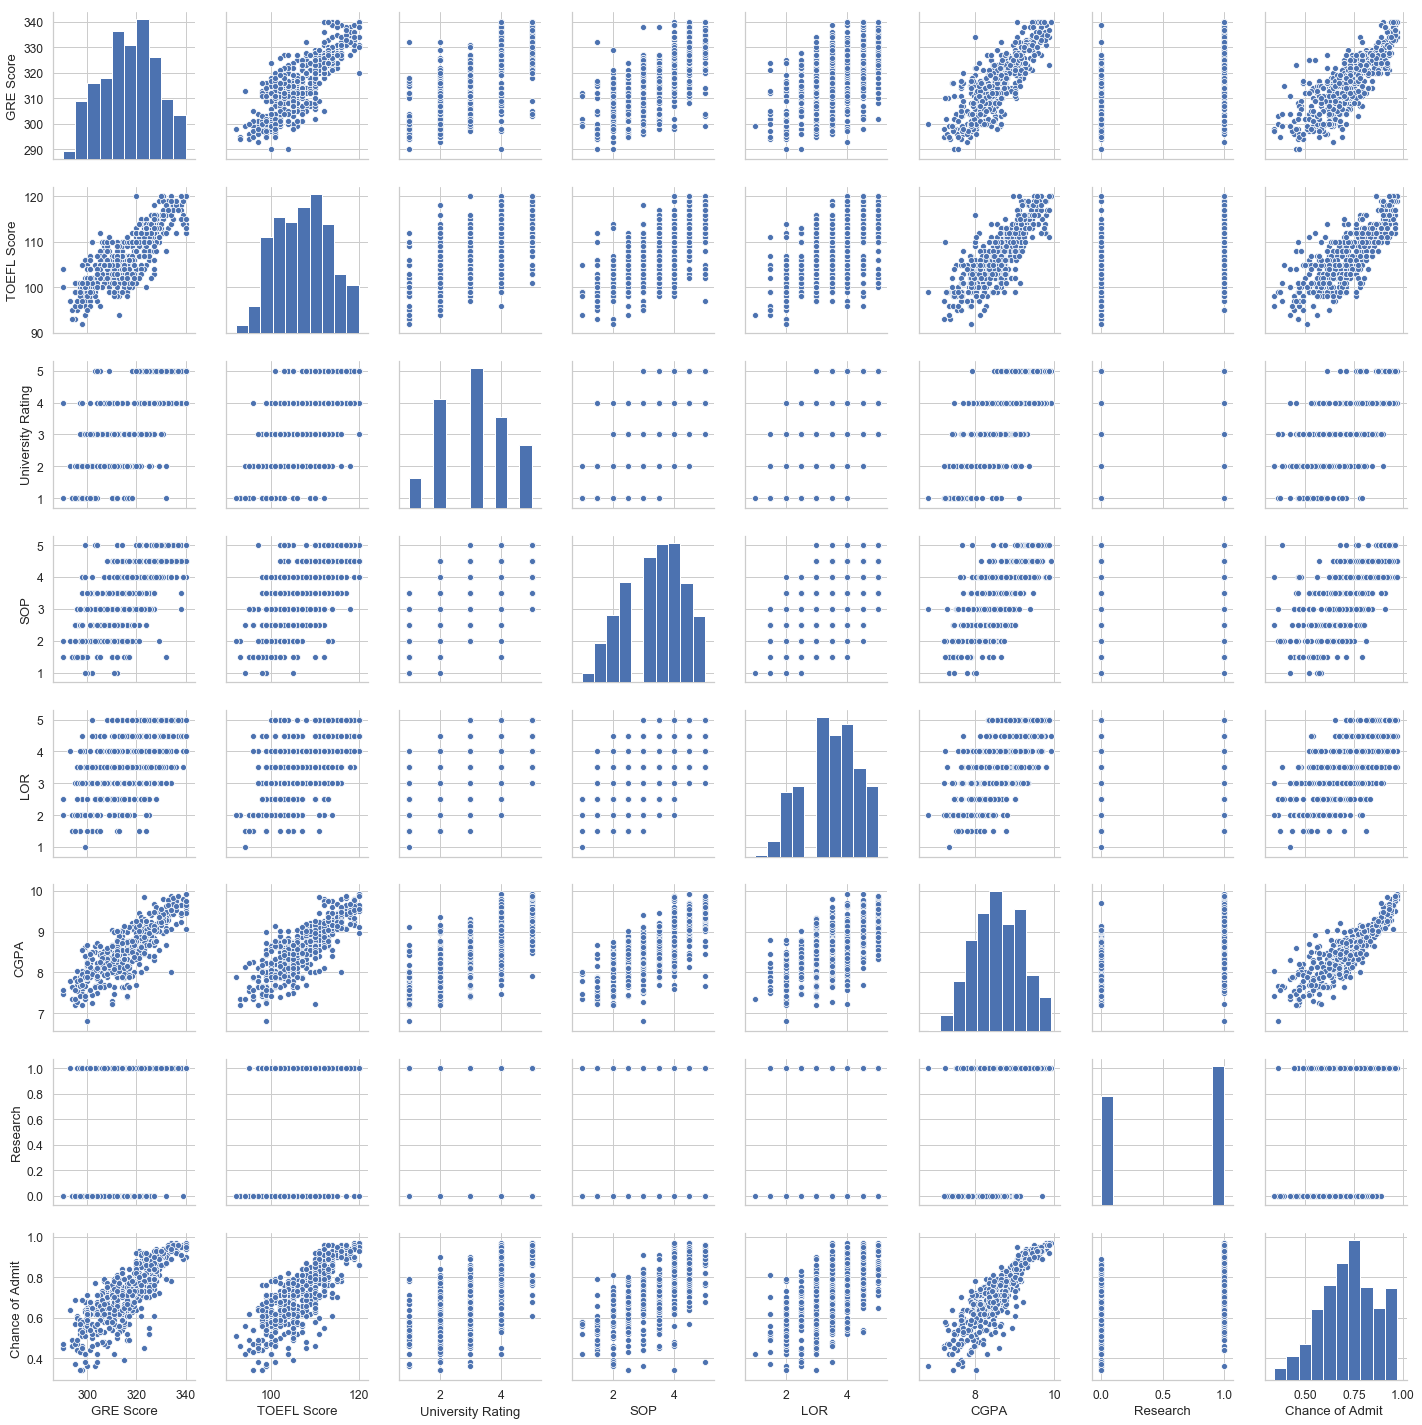

In [35]:
#Pair plot with all vairables against all variables
sns.pairplot(dframe)

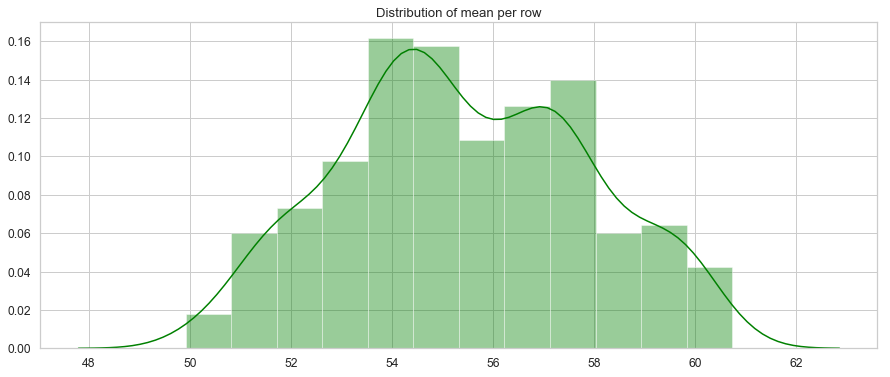

In [36]:
plt.figure(figsize = (15,6))
plt.title("Distribution of mean per row")
sns.distplot(dframe.mean(axis = 1) , color = 'green' , kde = True )
#plt.legend()
plt.show()

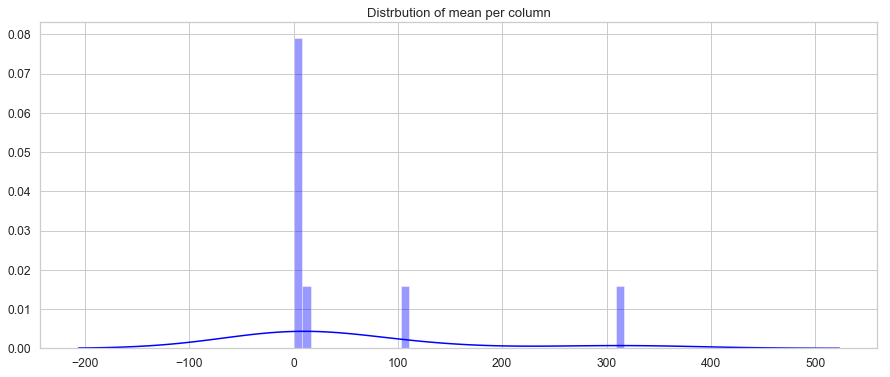

In [37]:
plt.figure(figsize = (15,6))
plt.title("Distrbution of mean per column")
sns.distplot(dframe.mean(axis = 0) , color = 'blue' , kde = True , bins = 40)
plt.show()

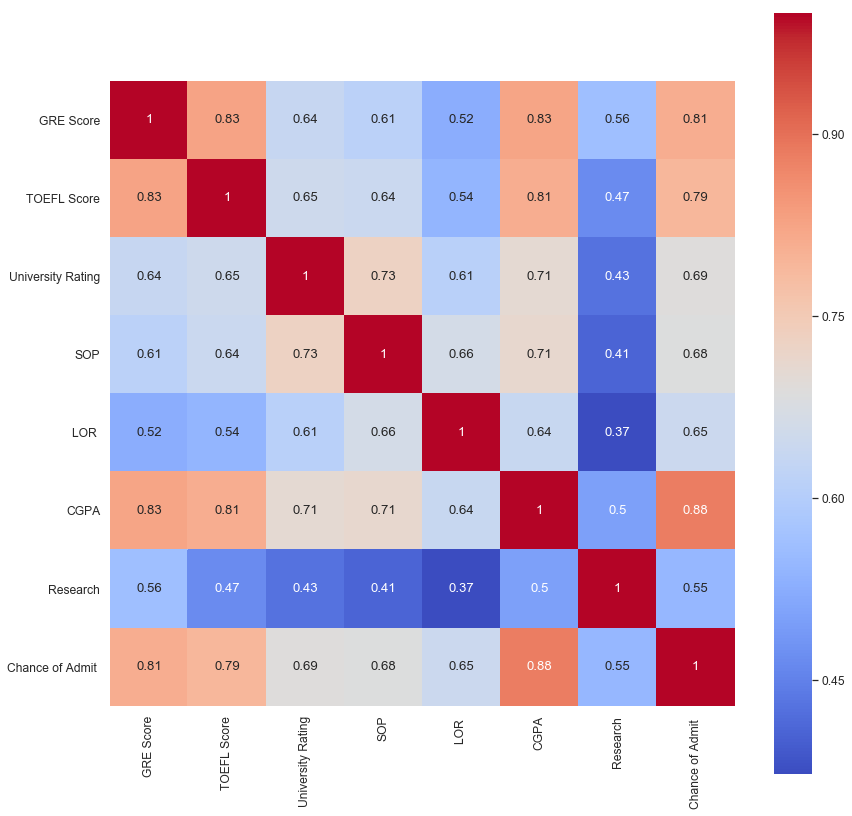

In [25]:
#correlation matrix
dframe.drop(['Serial No.'] , axis = 1 , inplace = True)
cor = dframe.corr()
f,ax = plt.subplots(figsize = (14,14))
sns.heatmap(cor , square = True,cmap = "coolwarm" , annot = True)

In [7]:
from sklearn.preprocessing import MinMaxScaler
features = dframe.iloc[: , :].values
target_var = dframe.loc[:,"Chance of Admit "]
sc = MinMaxScaler()
features = sc.fit_transform(features)


In [141]:
from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE

pca = PCA(3)
pca_df = pca.fit_transform(features)
print("Explained Variance ration -per principal componenet {}".format(pca.explained_variance_ratio_))
print(pca_df.shape)

Explained Variance ration -per principal componenet [0.64809296 0.19380855 0.054377  ]
(500, 3)


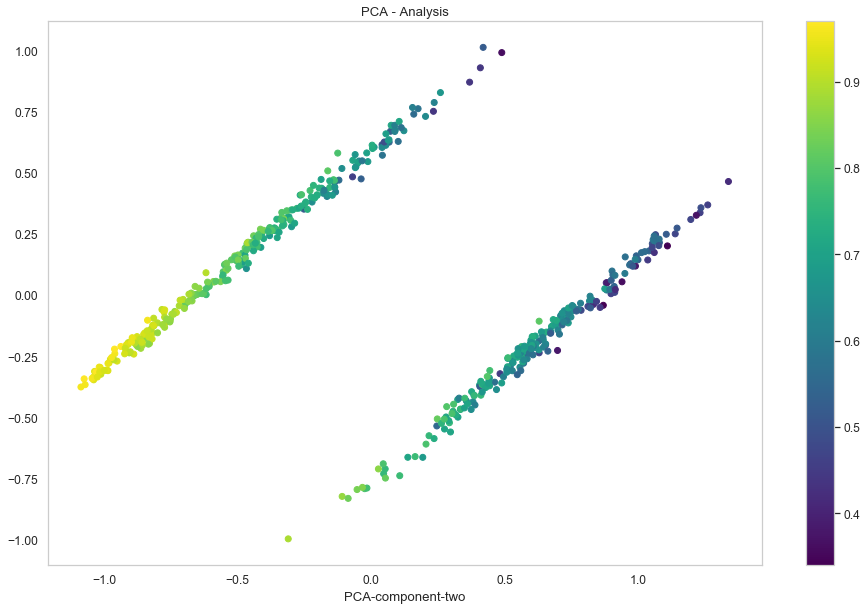

In [142]:
#Visualizing
fr = pd.DataFrame({'pca-one' : pca_df[:,0] ,'pca-two':pca_df[:,1]})
plt.figure(figsize = (16,10))
plt.grid(False)
plt.title("PCA - Analysis")
plt.scatter(fr['pca-one'] , fr['pca-two'] , cmap = plt.cm.viridis, c = target_var)
plt.xlabel("PCA-component-one")
plt.xlabel("PCA-component-two")
plt.colorbar()


In [143]:
#Using tsne algorithm
from sklearn.manifold import TSNE

model = TSNE(n_components = 3 , random_state = 42 , perplexity = 30)
tsne = model.fit_transform(features)


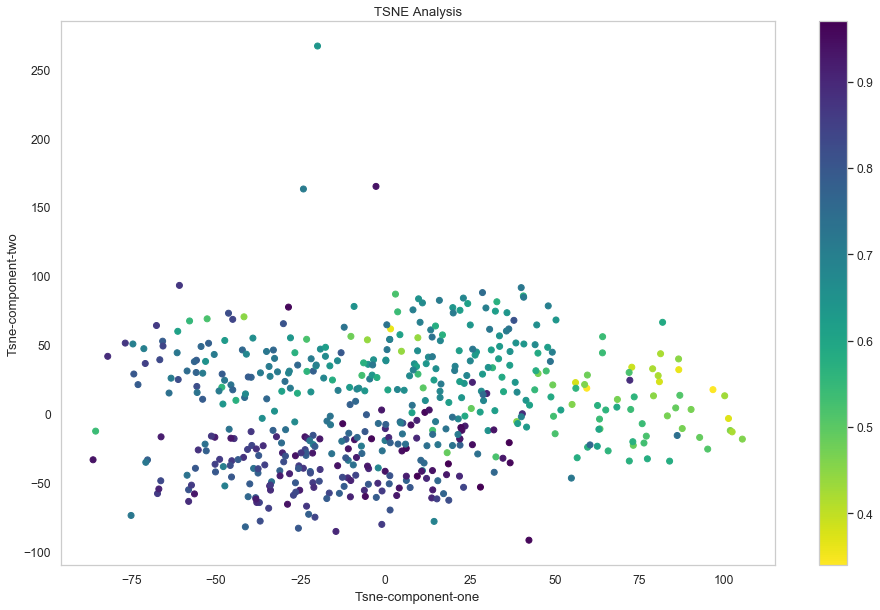

In [145]:
#Visualizing the embeddings
tsne_fr = pd.DataFrame({'tsne-one':tsne[:,0] , 'tsne-two':tsne[:,1]})
plt.figure(figsize = (16,10))
plt.scatter(tsne_fr['tsne-one'] , tsne_fr['tsne-two'] ,cmap = plt.cm.viridis_r ,c = target_var )
plt.title("TSNE Analysis")
plt.grid(False)
plt.xlabel("Tsne-component-one")
plt.ylabel("Tsne-component-two")
plt.colorbar()

In [6]:
#Finding correlation with chance of admit
cor = dframe.corr()['Chance of Admit ']
#cor[np.argsort(cor)[::-1]] #Arranging in descending order
print(cor[::-1])

Chance of Admit      1.000000
Research             0.545871
CGPA                 0.882413
LOR                  0.645365
SOP                  0.684137
University Rating    0.690132
TOEFL Score          0.792228
GRE Score            0.810351
Serial No.           0.008505
Name: Chance of Admit , dtype: float64


In [3]:
#Creating a feature dataframe and a target dataframe
dframe.drop(['Serial No.'] , axis = 1 , inplace = True)
X = dframe.iloc[:,:7]
y = dframe.loc[:,"Chance of Admit "]
print(X.shape , y.shape)


(500, 7) (500,)


In [4]:
#Using train_test_split to create training and testing models
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train ,y_test = train_test_split(X,y , random_state = 42 ,test_size = 0.20)


In [51]:
feat_t_X = sc.fit_transform(X_train)


(400, 7)

In [26]:
#modelling begins
# Steps
#1) Use individual regression models to compare accuracy
#2) Use a stacked model to compare the accuracy
#3) Use a ANN to compare the accuracy

In [5]:
from sklearn.metrics import r2_score , mean_squared_error , mean_squared_log_error
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor , RandomForestRegressor
from vecstack import stacking
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

In [6]:
base_op = pd.DataFrame(columns = ['MSE' , 'RMSE' , 'MSE Log' , 'R2-Score'])

def insert_data(df , model_name , mse, rmse , log_mse , r2):
    df.loc[model_name] = [mse , rmse , log_mse , r2]

def print_results(model_name , mse , rmse , mse_log , r2_score):
    
    print("******{} Regression******".format(model_name))
    print("---------------------------")
    print("MSE Score : {}".format(mse))
    print("RMSE : {}".format(rmse))
    print("Mean Squared Log Error : {}".format(mse_log))
    print("R2-Score : {}".format(r2_score))
    

In [7]:
def calc_results(model_name,pred , y_test):
    
    x = model_name
    mse = mean_squared_error(y_test , pred)
    mse_log = mean_squared_log_error(y_test , pred)
    rmse = sqrt(mse)
    model_r2 = r2_score(y_test , pred)
    
    insert_data(base_op,x , mse,rmse ,mse_log , model_r2)
    print_results(x , mse , rmse , mse_log , model_r2)


In [8]:
#Individual models
ridge_reg  = Ridge( random_state = 42) #random_state for reproducability of results
ridge_reg.fit(X_train , y_train)
ridge_pred = ridge_reg.predict(X_test)


In [9]:
calc_results('Ridge',ridge_pred , y_test)

******Ridge Regression******
---------------------------
MSE Score : 0.0037223223199539797
RMSE : 0.061010837725390885
Mean Squared Log Error : 0.0014109817781031392
R2-Score : 0.8179793486575071


In [10]:
_ = joblib.dump(ridge_reg , 'Rdige_reg.pkl')

In [11]:
#Fitting Support Vector Regression
svm_clf = SVR(kernel = 'rbf' , gamma = 'auto')
svm_clf.fit(X_train , y_train)
svm_pred = svm_clf.predict(X_test)


In [12]:
calc_results('SVR' , svm_pred , y_test)

******SVR Regression******
---------------------------
MSE Score : 0.008837343623182736
RMSE : 0.09400714666014885
Mean Squared Log Error : 0.003200617541580375
R2-Score : 0.5678560575460766


In [13]:
_ = joblib.dump(svm_clf , 'SVM_reg.pkl')

In [14]:
#Using AdaBoost Regression

ada_reg = AdaBoostRegressor(n_estimators = 100)
ada_reg.fit(X_train , y_train)
ada_reg_pred = ada_reg.predict(X_test)


In [15]:
calc_results('AdaBoost' , ada_reg_pred , y_test)

******AdaBoost Regression******
---------------------------
MSE Score : 0.0051924955562865
RMSE : 0.07205897276735562
Mean Squared Log Error : 0.0019363045924402362
R2-Score : 0.7460882368564059


In [16]:
_ = joblib.dump(ada_reg , 'ADA_reg.pkl')

In [17]:
#Using random forest Regression

rf_reg = RandomForestRegressor(n_estimators = 100 , random_state = 42)
rf_reg.fit(X_train , y_train)
rf_pred = rf_reg.predict(X_test)


In [18]:
calc_results("RandomForest" , rf_pred , y_test)

******RandomForest Regression******
---------------------------
MSE Score : 0.004321254300000006
RMSE : 0.06573624799150014
Mean Squared Log Error : 0.0016457966607214183
R2-Score : 0.7886917212713934


In [19]:
_ = joblib.dump(rf_reg , 'rf_reg.pkl')

In [20]:
base_op.to_csv('Base_Learners_OP.csv')

In [65]:
X_train.shape

(400, 7)

In [21]:
base_op.head()

,MSE,RMSE,MSE Log,R2-Score
Ridge,0.003722,0.061011,0.001411,0.817979
SVR,0.008837,0.094007,0.003201,0.567856
AdaBoost,0.005192,0.072059,0.001936,0.746088
RandomForest,0.004321,0.065736,0.001646,0.788692


In [22]:
def plot_scores(df,score_name):
    
    x = list(df.index.values)
    y = list(df.loc[:,score_name].values)
    plt.figure(figsize = (10,8))
    plt.title("Comparison of {}".format(score_name))
    plt.bar(x,y,color = ['mediumpurple','dodgerblue','springgreen','lightsalmon'])
    plt.xlabel("Models")
    plt.ylabel(score_name)
    plt.show()
    

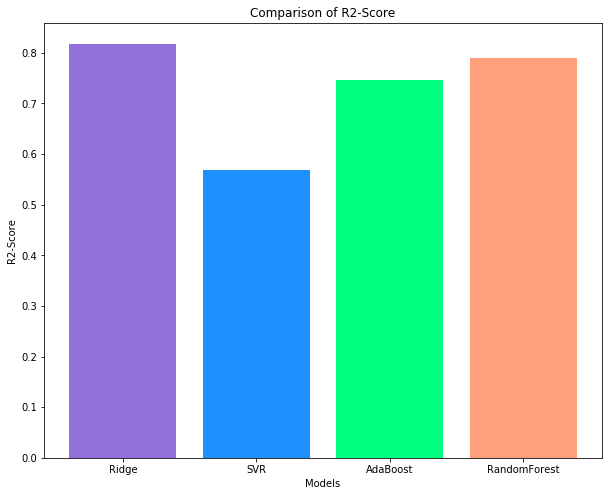

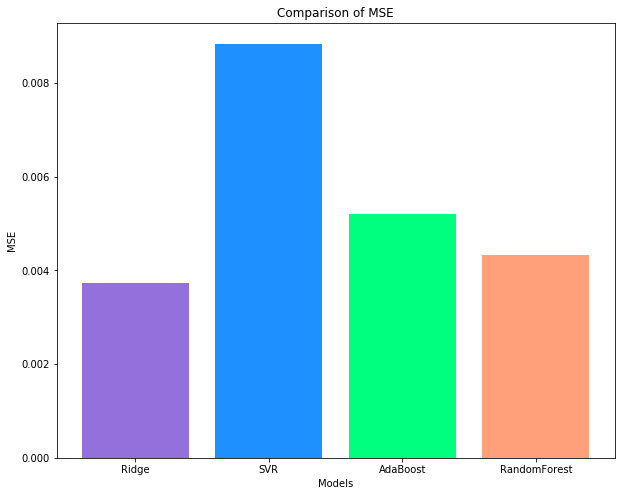

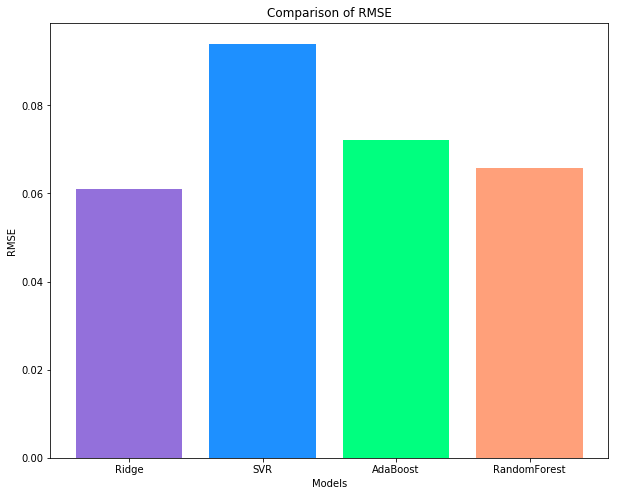

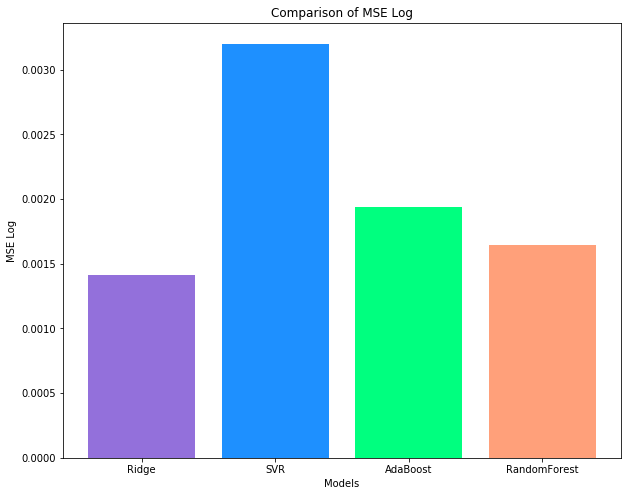

In [23]:
#R2-Score
plot_scores(base_op , 'R2-Score')

#MSE 
plot_scores(base_op , 'MSE')
#Rmse
plot_scores(base_op , 'RMSE')
#MSE Log
plot_scores(base_op , 'MSE Log')